<a href="https://colab.research.google.com/github/qmeng222/MNIST-Playground/blob/main/more-on-data/oversampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task:

---
*   Dataset: MNIST
*   Sample sizes: 500~4000
*   Methodology:
    - train using unique samples
    - train with a doubling of the samples

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
# import dataset (comes with colab!)
dataFull = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',') # np array
print(type(dataFull))
print(dataFull.shape)
print(dataFull)

<class 'numpy.ndarray'>
(20000, 785)
[[6. 0. 0. ... 0. 0. 0.]
 [5. 0. 0. ... 0. 0. 0.]
 [7. 0. 0. ... 0. 0. 0.]
 ...
 [2. 0. 0. ... 0. 0. 0.]
 [9. 0. 0. ... 0. 0. 0.]
 [5. 0. 0. ... 0. 0. 0.]]


👆 20000 numbers, 785 = 28^2 + 1 (28 pixels x 28 pixels, 1 label)

In [ ]:
def makeTheDataset(N,doubleTheData=False): # N: sample size

  # extract labels, then remove from data:
  labels = dataFull[:N,0] # extract the 1st col as labels
  data   = dataFull[:N,1:]

 # normalize (both train & test) data to [0 1]:
  dataNorm = data / np.max(data)

  # if doubleTheData: # default is False
  #   # (NOT RECOMMENDED) doubling ALL dataset (train and test):
  #   dataNorm = np.concatenate((dataNorm,dataNorm),axis=0)
  #   labels   = np.concatenate((labels,labels),axis=0)

  # np array -> pytorch tensor:
  dataT   = torch.tensor( dataNorm ).float()
  labelsT = torch.tensor( labels ).long()

  # use scikitlearn to split the data:
  train_data, test_data, train_labels, test_labels = train_test_split(dataT, labelsT, train_size=.9)
  print(type(train_data), type(test_data), type(train_labels), type(test_labels))
  print(train_data.shape, test_data.shape, train_labels.shape, test_labels.shape)

  # double TRAIN dataset only (not the test dataset) after splitting:
  if doubleTheData:
    train_data   = torch.cat((train_data,train_data),axis=0)
    train_labels = torch.cat((train_labels,train_labels),axis=0)

  # pytorch tensor -> pytorch dataset obj:
  train_data = TensorDataset(train_data,train_labels)
  test_data  = TensorDataset(test_data,test_labels)

  # pytorch dataset obj -> pytorch dataloader obj:
  batchsize    = 20
  train_loader = DataLoader(train_data,batch_size=batchsize,shuffle=True,drop_last=True)
  test_loader  = DataLoader(test_data,batch_size=test_data.tensors[0].shape[0])

  return train_loader,test_loader

In [ ]:
# test1: sample size=200, wo/ oversampling
r,t = makeTheDataset(200,False) # call the above func, r(train_loader), t(test_loader)
print(r.dataset.tensors) # (data, label) tuple
print(t.dataset.tensors)

<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([180, 784]) torch.Size([20, 784]) torch.Size([180]) torch.Size([20])
(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([0, 1, 3, 2, 1, 8, 0, 1, 3, 2, 0, 4, 0, 5, 0, 3, 2, 7, 8, 1, 7, 5, 2, 6,
        1, 7, 1, 7, 2, 1, 3, 3, 7, 1, 5, 7, 2, 6, 7, 5, 6, 9, 6, 2, 2, 2, 3, 4,
        2, 7, 2, 5, 4, 6, 3, 4, 6, 4, 6, 7, 2, 2, 5, 7, 6, 6, 0, 3, 9, 4, 9, 2,
        7, 8, 0, 7, 6, 7, 5, 0, 9, 2, 6, 5, 0, 8, 6, 7, 2, 7, 9, 2, 3, 6, 3, 6,
        1, 9, 0, 2, 7, 8, 7, 4, 7, 2, 8, 1, 2, 4, 7, 2, 4, 1, 3, 2, 7, 0, 2, 1,
        1, 3, 8, 7, 4, 8, 9, 6, 2, 9, 3, 4, 7, 1, 9, 0, 2, 8, 4, 2, 3, 2, 6, 8,
        8, 7, 5, 1, 8, 2, 0, 2, 3, 1, 7, 6, 0, 7, 3, 8, 9, 7, 5, 8, 7, 2, 9, 0,
        5, 6

In [ ]:
print(r.dataset.tensors[0].shape) # train_data
print(t.dataset.tensors[0].shape) # test_data

torch.Size([180, 784])
torch.Size([20, 784])


In [ ]:
# test2: sample size=200, w/ oversampling (doubling the data)
r,t = makeTheDataset(200,True)
print(r.dataset.tensors) # (data, label) tuple
print(t.dataset.tensors)

<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([180, 784]) torch.Size([20, 784]) torch.Size([180]) torch.Size([20])
(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([0, 7, 3, 6, 7, 7, 6, 3, 7, 8, 2, 2, 1, 8, 2, 0, 7, 6, 0, 9, 1, 6, 6, 1,
        7, 2, 2, 2, 6, 5, 2, 2, 9, 7, 3, 1, 2, 1, 2, 5, 8, 8, 1, 3, 6, 8, 7, 6,
        2, 1, 6, 1, 5, 3, 2, 1, 5, 3, 2, 7, 2, 4, 0, 4, 4, 1, 0, 6, 8, 1, 2, 3,
        0, 2, 9, 8, 3, 1, 2, 2, 5, 7, 8, 9, 4, 3, 0, 7, 9, 9, 4, 3, 2, 5, 7, 7,
        7, 5, 8, 7, 1, 8, 0, 6, 7, 9, 7, 3, 8, 7, 5, 8, 4, 0, 2, 5, 4, 3, 1, 8,
        2, 8, 6, 4, 5, 0, 7, 0, 2, 9, 4, 0, 7, 6, 0, 5, 1, 1, 2, 2, 2, 2, 5, 6,
        8, 3, 7, 5, 4, 2, 3, 6, 6, 9, 9, 6, 7, 8, 2, 9, 4, 8, 9, 7, 2, 0, 7, 1,
        7, 7

In [ ]:
print(r.dataset.tensors[0].shape)
print(t.dataset.tensors[0].shape)

torch.Size([360, 784])
torch.Size([20, 784])


👆 360+40=400, doubling the original sample size 200.

In [ ]:
def createTheMNISTNet():

  # model class:
  class mnistNet(nn.Module):
    def __init__(self):
      super().__init__()

      ### input layer
      self.input = nn.Linear(784,64)

      ### hidden layer
      self.fc1 = nn.Linear(64,32)
      self.fc2 = nn.Linear(32,32)

      ### output layer
      self.output = nn.Linear(32,10)

    # forward pass
    def forward(self,x):
      x = F.relu( self.input(x) )
      x = F.relu( self.fc1(x) )
      x = F.relu( self.fc2(x) )
      return self.output(x) # no softmax is needed with CEL loss func

  # create a model instance
  net = mnistNet()

  # loss function
  lossfun = nn.CrossEntropyLoss() # softmax is automatically included in cross entropy loss function

  # optimizer
  optimizer = torch.optim.SGD(net.parameters(),lr=.01)

  return net,lossfun,optimizer

In [ ]:
# a function that trains the model:
def function2trainTheModel():

  numepochs = 50

  # create a new model
  net,lossfun,optimizer = createTheMNISTNet()

  # initialize losses
  losses    = torch.zeros(numepochs)
  trainAcc  = []
  testAcc   = []

  # loop over epochs
  for epochi in range(numepochs):

    # loop over training data batches
    batchAcc  = []
    batchLoss = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = net(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # loss from this batch
      batchLoss.append(loss.item())

      # compute accuracy
      matches = torch.argmax(yHat,axis=1) == y     # booleans (false/true)
      matchesNumeric = matches.float()             # convert to numbers (0/1)
      accuracyPct = 100*torch.mean(matchesNumeric) # average and x100
      batchAcc.append( accuracyPct )               # add to list of accuracies
    # end of batch loop...

    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # and get average losses across the batches
    losses[epochi] = np.mean(batchLoss)

    # test accuracy
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    with torch.no_grad(): # deactivates autograd
      yHat = net(X)

    # compare the following really long line of code to the training accuracy lines
    testAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1)==y).float()) )

  # end epochs

  # function output
  return trainAcc,testAcc,losses,net

# Run the model once to confirm it works:

<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([4500, 784]) torch.Size([500, 784]) torch.Size([4500]) torch.Size([500])


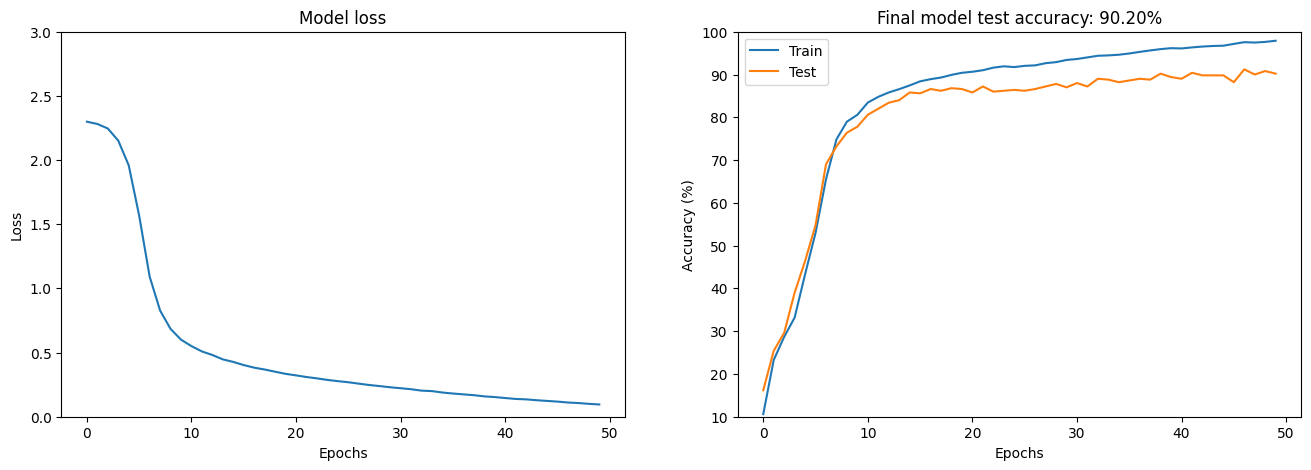

In [ ]:
# generate dataloader objects:
train_loader,test_loader = makeTheDataset(5000) # 5000 sample size, doubleTheData=False (default)

# train the model:
trainAcc,testAcc,losses,net = function2trainTheModel()

# plot the results:
fig,ax = plt.subplots(1,2,figsize=(16,5))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,3])
ax[0].set_title('Model loss')

ax[1].plot(trainAcc,label='Train')
ax[1].plot(testAcc,label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

# Run an experiment showing better performance with increased N (various sample sizes from 500 to 4000):

In [ ]:
# takes ~3 mins

# list of data sample sizes
samplesizes = np.arange(500,4001,500)

# initialize results matrix
resultsSingle = np.zeros((len(samplesizes),3))
resultsDouble = np.zeros((len(samplesizes),3))

for idx,ssize in enumerate(samplesizes):

  ### without doubling the data!

  # generate a dataset and train the model
  train_loader,test_loader = makeTheDataset(ssize,False)
  trainAcc,testAcc,losses,net = function2trainTheModel()

  # grab the results
  resultsSingle[idx,0] = np.mean(trainAcc[-5:])
  resultsSingle[idx,1] = np.mean(testAcc[-5:])
  resultsSingle[idx,2] = torch.mean(losses[-5:]).item()

  ### with doubling the data!

  # generate a dataset and train the model
  train_loader,test_loader = makeTheDataset(ssize,True)
  trainAcc,testAcc,losses,net = function2trainTheModel()

  # grab the results
  resultsDouble[idx,0] = np.mean(trainAcc[-5:])
  resultsDouble[idx,1] = np.mean(testAcc[-5:])
  resultsDouble[idx,2] = torch.mean(losses[-5:]).item()

<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([450, 784]) torch.Size([50, 784]) torch.Size([450]) torch.Size([50])
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([450, 784]) torch.Size([50, 784]) torch.Size([450]) torch.Size([50])
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([900, 784]) torch.Size([100, 784]) torch.Size([900]) torch.Size([100])
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([900, 784]) torch.Size([100, 784]) torch.Size([900]) torch.Size([100])
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([1350, 784]) torch.Size([150, 784]) torch.Size([1350]) torch.Size([150])
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([1350, 784]) torch.Size([150,

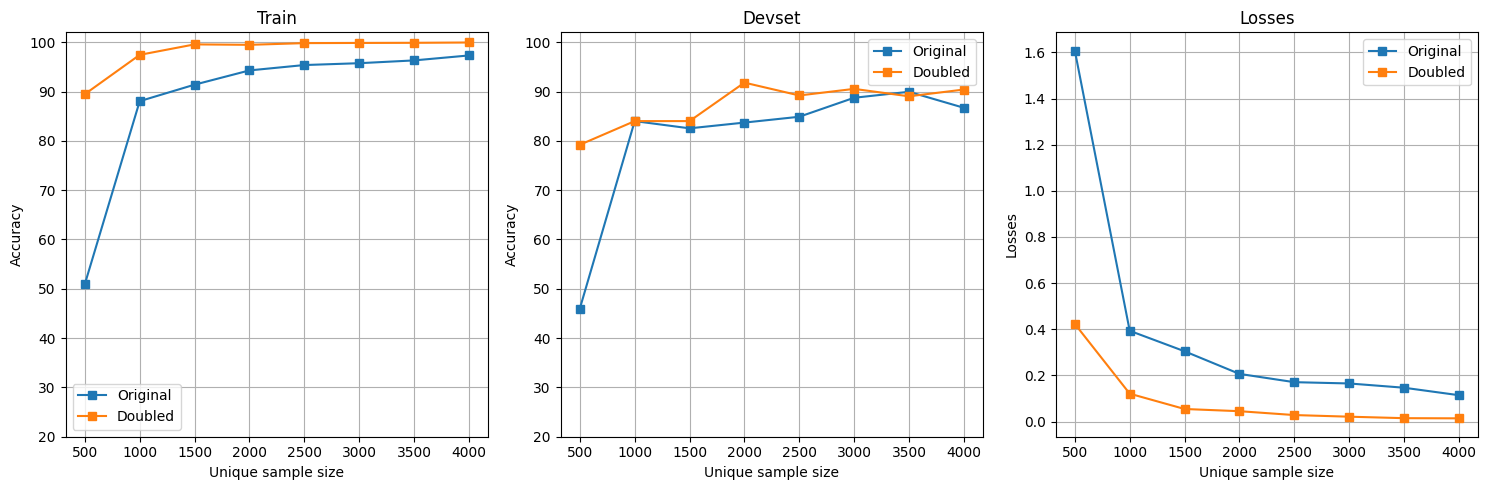

In [ ]:
# plot the results:

fig,ax = plt.subplots(1,3,figsize=(15,5))

# axis and title labels
titles    = ['Train','Devset','Losses']
yaxlabels = ['Accuracy','Accuracy','Losses']

# common features
for i in range(3):

  # plot the lines
  ax[i].plot(samplesizes,resultsSingle[:,i],'s-',label='Original')
  ax[i].plot(samplesizes,resultsDouble[:,i],'s-',label='Doubled')

  # make it look nicer
  ax[i].set_ylabel(yaxlabels[i])
  ax[i].set_title(titles[i])
  ax[i].legend()
  ax[i].set_xlabel('Unique sample size')
  ax[i].grid('on')

  if i<2:
    ax[i].set_ylim([20,102])

plt.tight_layout()
plt.show()

Conclusions:

---
1.   Increasing sample size has a negligible impact on training performance for larger sample sizes; it primarily influences performance with smaller sample sizes.
2.   Oversampling can potentially lead to overfitting (introduce duplicated or overly similar samples into the training data, causing the model to overfit to the minority class).
3.   To mitigate the risk of overfitting when using oversampling, one common approach is to ensure that the oversampling is applied only to the training data. The validation and test datasets should remain representative of the true distribution, without additional oversampling. This helps in evaluating the model's generalization abilities and can prevent overfitting.
  - ❌ When test dataset is doubled, overfitting occurs as the model is exposed to duplicate test data, causing it to memorize the samples.
  - ✅ Doubling the TRAIN dataset only is sufficient.  